In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency

In [19]:
df = pd.read_csv("customer_behaviour.csv")
df.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [21]:
# remove returns/cancellations
df = df[df["Quantity"] > 0]

# drop missing customer IDs
df = df.dropna(subset=["CustomerID"])


In [22]:
df["TotalSpend"] = df["Quantity"] * df["UnitPrice"]

In [23]:
avg_price = df["UnitPrice"].mean()

df["discount_flag"] = (df["UnitPrice"] < avg_price).astype(int)


In [24]:
discount = df[df["discount_flag"] == 1]["TotalSpend"]
no_discount = df[df["discount_flag"] == 0]["TotalSpend"]

print("Discount size:", len(discount))
print("No discount size:", len(no_discount))


Discount size: 289169
No discount size: 108755


In [25]:
t_stat, p_value = ttest_ind(discount, no_discount, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -16.4338945166235
P-value: 1.147508567136714e-60


In [26]:
print("Mean spend (discount):", discount.mean())
print("Mean spend (no discount):", no_discount.mean())


Mean spend (discount): 18.7610007780917
Mean spend (no discount): 32.05653137786768


C:\Users\sayan\AppData\Local\Temp\ipykernel_3988\2411925620.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([discount, no_discount], labels=["Discount", "No Discount"])


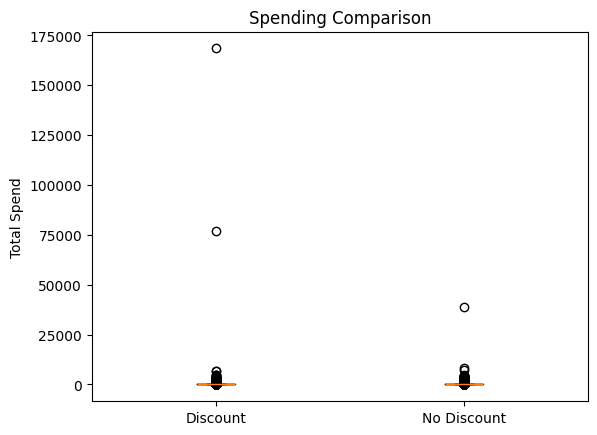

In [27]:
plt.boxplot([discount, no_discount], labels=["Discount", "No Discount"])
plt.ylabel("Total Spend")
plt.title("Spending Comparison")
plt.show()

## Test Results
T-statistic: −16.43

P-value: 1.15 × 10⁻⁶⁰ (basically 0)

## We wanted to check:
Do customers who receive discounts spend more money than customers who don’t?
What we found

The statistical test showed that:
There is a very strong difference in spending between the two groups.
The p-value is almost zero, which means:
This difference is NOT due to random chance.

## Direction of the difference

Because the t-statistic is negative, it tells us:

Customers who received discounts actually spent less on average than customers who paid full price.

## In plain words:

Customers who used discounts spent significantly less money per purchase compared to customers who did not receive discounts. This difference is statistically significant, meaning it is very unlikely to have happened by chance.